In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

About the dataset -> The Adult dataset is from the Census Bureau and the task is to predict whether a given adult makes more than $50,000

In [151]:
df = pd.read_csv("/content/adult.csv")

# understanding the data

In [43]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [41]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [42]:
df.describe(include ='object')

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


* Age: Discrete data (from 17 to 90)
Work class (Private, Federal-Government, etc): Nominal data (9 categories)
* Final Weight (the number of people the census believes the entry represents): Discrete
* Education (the highest level of education obtained): Ordinal (16 categories)
* Education Number (the number of years of education): Discrete (from 1 to 16)
* Marital Status: Nominal (7 categories)
* Occupation (Transport-Moving, Craft-Repair, etc): Nominal (15 categories)
* relationship (unmarried, not in the family, etc): Nominal (6 categories)
* Race: Nominal (5 categories)
* Gender: Nominal (2 categories)
* Capital Gain: Continous
* Capital Loss: Continous
* Hours (worked) per week: Discrete (from 1 to 99)
* Native Country: Nominal (42 countries)
* Income : target (≤50k, >50k)

# Missing Values

In [152]:
df.replace('?',None,inplace=True)

In [153]:
null_values = df.isnull().sum()
null_values = pd.DataFrame(null_values,columns=['null'])
sum_total=len(df)
null_values['percentage'] = null_values['null']/sum_total *100
round(null_values,3).sort_values('percentage',ascending=False)

,null,percentage
occupation,2809,5.751
workclass,2799,5.731
native-country,857,1.755
age,0,0.000
fnlwgt,0,0.000
education,0,0.000
educational-num,0,0.000
marital-status,0,0.000
relationship,0,0.000
race,0,0.000


In [46]:
len(df.loc[(df['occupation'].isnull()) & ((df['workclass'].isnull()))])

2799

In [154]:
df.dropna(inplace = True)

In [155]:
# check for duplicates
df.drop_duplicates(inplace=True)

In [156]:
df.shape

(45175, 15)

# Data Exploratory

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45175 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45175 non-null  int64 
 1   workclass        45175 non-null  object
 2   fnlwgt           45175 non-null  int64 
 3   education        45175 non-null  object
 4   educational-num  45175 non-null  int64 
 5   marital-status   45175 non-null  object
 6   occupation       45175 non-null  object
 7   relationship     45175 non-null  object
 8   race             45175 non-null  object
 9   gender           45175 non-null  object
 10  capital-gain     45175 non-null  int64 
 11  capital-loss     45175 non-null  int64 
 12  hours-per-week   45175 non-null  int64 
 13  native-country   45175 non-null  object
 14  income           45175 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


<Axes: ylabel='income'>

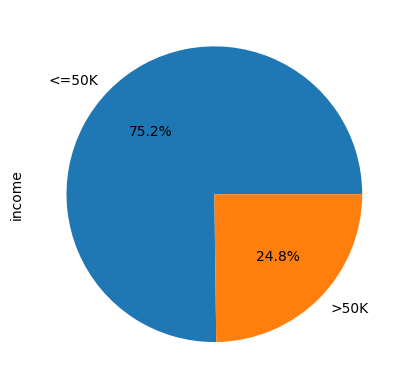

In [50]:
df['income'].value_counts().plot.pie(autopct= '%1.1f%%')

we can clearly see that adults with income less than 50000 are almost 3 times greater than adults with income greater than 50000.



Text(0, 0.5, 'count')

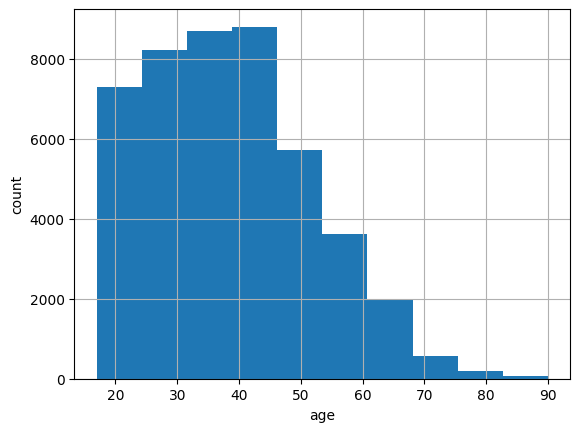

In [52]:
df['age'].hist()
plt.xlabel('age')
plt.ylabel('count')

By observation age is right-skewed and not symetric

Text(0, 0.5, 'count')

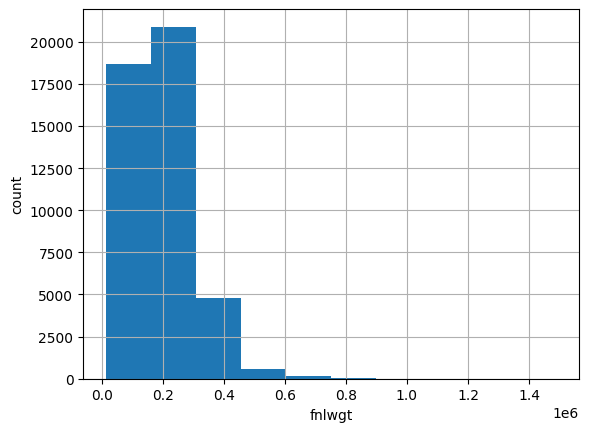

In [55]:
df['fnlwgt'].hist()
plt.xlabel('fnlwgt')
plt.ylabel('count')

fnlwgt is right-skewed too



Text(0, 0.5, 'count')

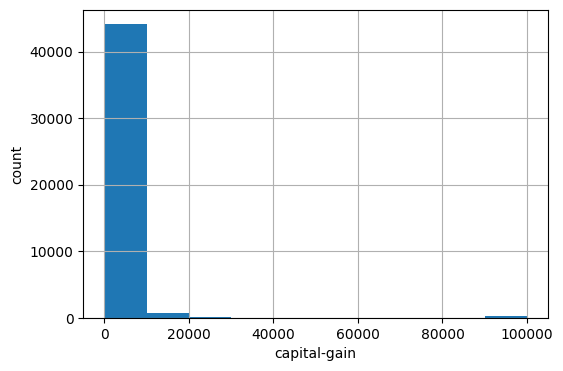

In [56]:
df['capital-gain'].hist(figsize=(6,4))
plt.xlabel('capital-gain')
plt.ylabel('count')

In [57]:
df['capital-gain'].describe()

count    45175.000000
mean      1102.576270
std       7510.249876
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

In [58]:
df['capital-gain'].value_counts()

0        41385
15024      498
7688       391
7298       351
99999      229
         ...  
22040        1
1731         1
7262         1
1639         1
2387         1
Name: capital-gain, Length: 121, dtype: int64

capital-gain shows that either a person has no gain or has gain of very large amount(10k or 99k). Also from df.describe() we can see that most of value are zero, so we can even remove this, this column does not making significant role in result, since most of the values is zero.

Text(0, 0.5, 'count')

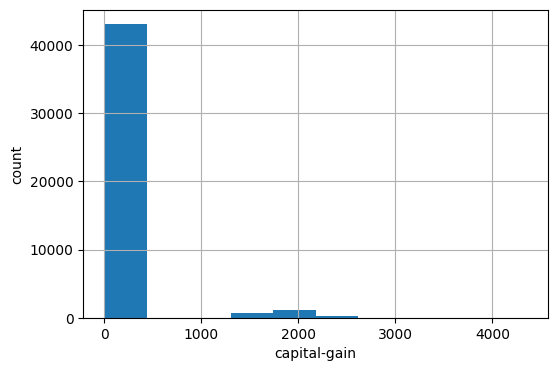

In [59]:
df['capital-loss'].hist(figsize=(6,4))
plt.xlabel('capital-gain')
plt.ylabel('count')

In [60]:
df['capital-loss'].value_counts()

0       43035
1902      294
1977      246
1887      228
2415       68
        ...  
419         1
155         1
1539        1
2201        1
1421        1
Name: capital-loss, Length: 97, dtype: int64

It is also similar to captain-gain we can also remove this feature too. as most of the rows have value zero.

Text(0, 0.5, 'count')

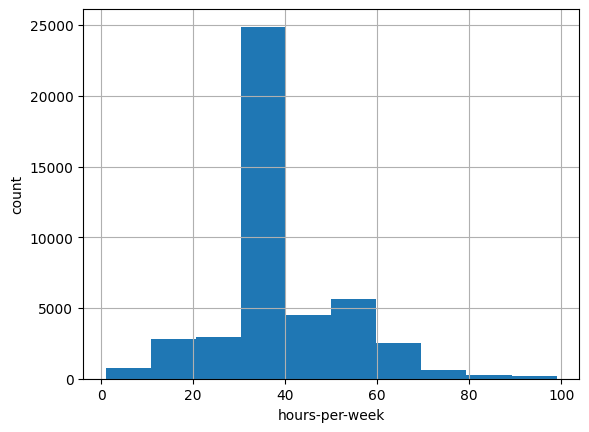

In [62]:
df['hours-per-week'].hist()
plt.xlabel('hours-per-week')
plt.ylabel('count')

So from graph we can see that hours per week is seems like normally distrubuted with max count for work hour between 30-40 with count around 25000, There are also few people who works 80-100 hours per week and some less than 20 which is unusual.

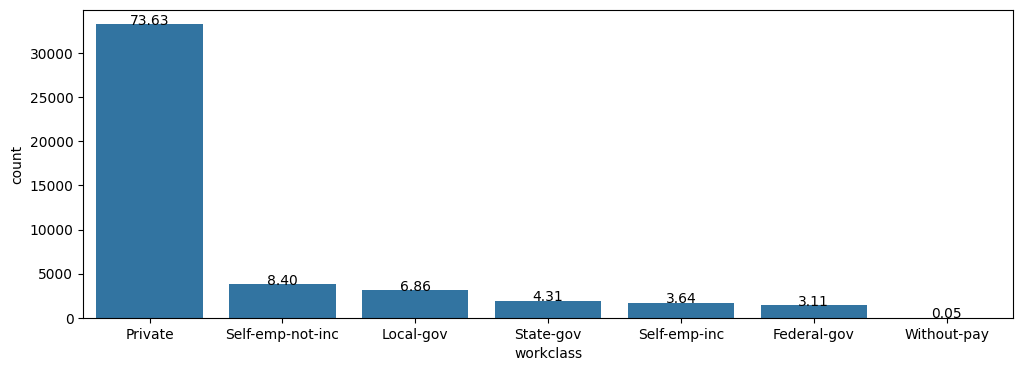

In [72]:
plt.figure(figsize=(12,4))

total = float(len(df['income']))

order = df['workclass'].value_counts().index


a = sns.countplot(x='workclass',data=df,order=order)

for f in a.patches:
    height = f.get_height()
    a.text(f.get_x() + f.get_width()/2., height+3, '{:1.2f}'.format((height/total)*100),ha="center")

Most of them are from private workclass with around 73% and without-pay is least count of around 0.05%

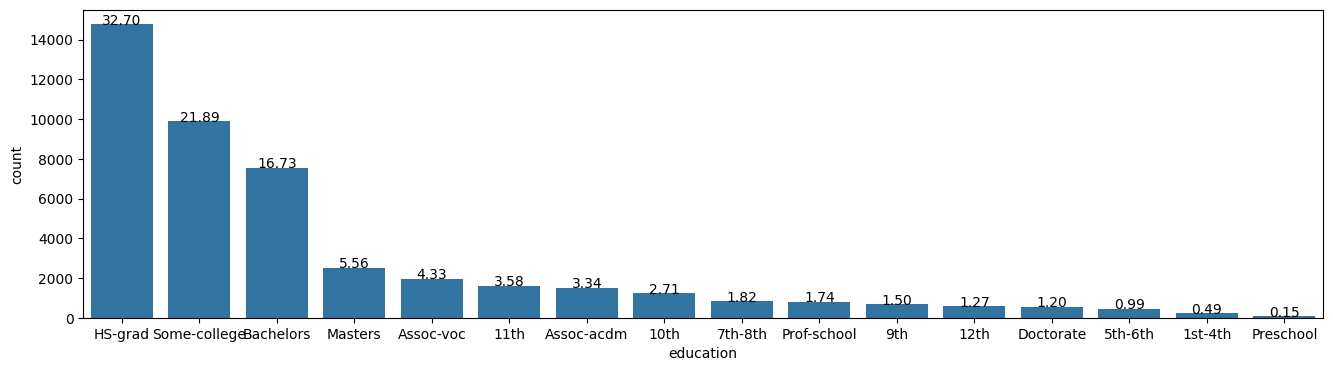

In [75]:
plt.figure(figsize=(16,4))

total = float(len(df['income']))

education_order = df['education'].value_counts().index

a = sns.countplot(x='education', data=df, order=education_order)

for f in a.patches:
    height = f.get_height()
    a.text(f.get_x() + f.get_width()/2., height+3, '{:1.2f}'.format((height/total)*100), ha="center")

HS-grad has highest no of adults and preschool has lowest.

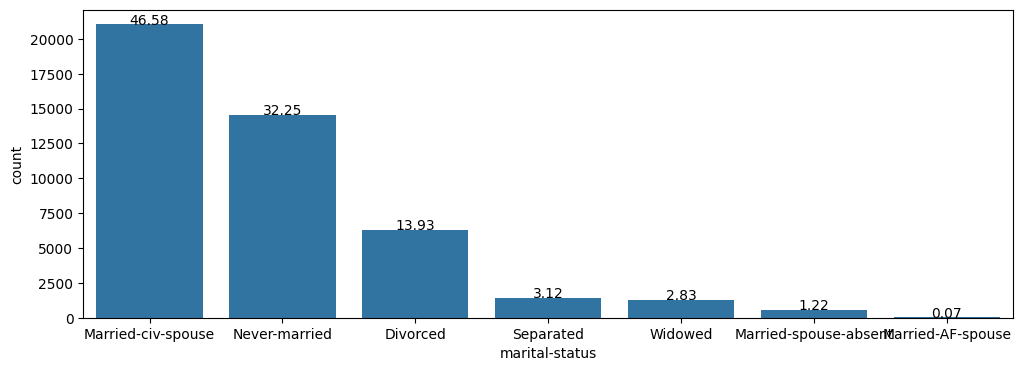

In [77]:
plt.figure(figsize=(12,4))

total = float(len(df['income']))

education_order = df['marital-status'].value_counts().index

a = sns.countplot(x='marital-status', data=df, order=education_order)

for f in a.patches:
    height = f.get_height()
    a.text(f.get_x() + f.get_width()/2., height+3, '{:1.2f}'.format((height/total)*100), ha="center")

Married-civ-spouse has maximum number of samples. Married-AF-spouse has minimum number

<ipython-input-87-988d91292760>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_xticklabels(a.get_xticklabels(), rotation=60)


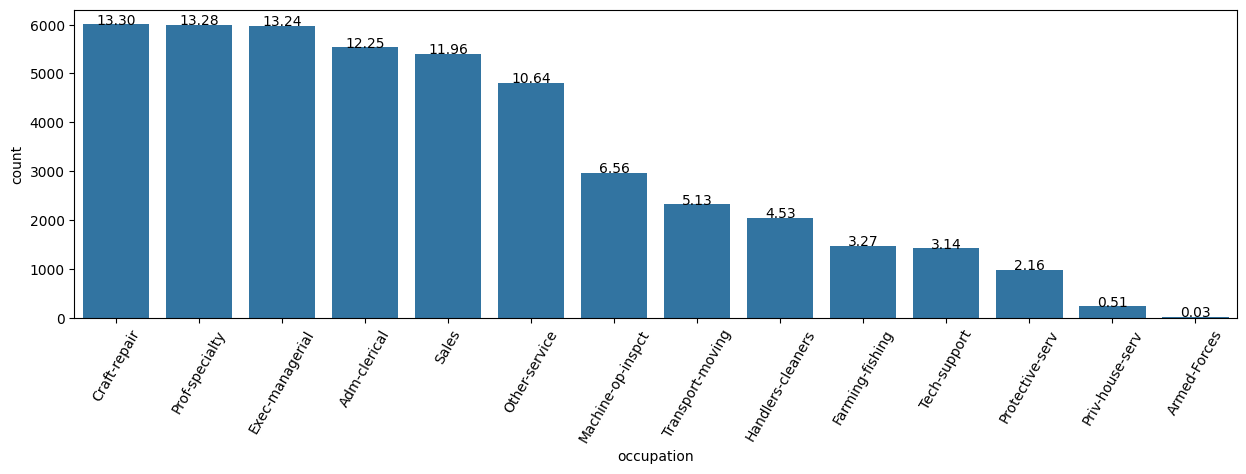

In [87]:
plt.figure(figsize=(15,4))

total = float(len(df['income']))

education_order = df['occupation'].value_counts().index

a = sns.countplot(x='occupation', data=df, order=education_order)

for f in a.patches:
    height = f.get_height()
    a.text(f.get_x() + f.get_width()/2., height+3, '{:1.2f}'.format((height/total)*100), ha="center")
a.set_xticklabels(a.get_xticklabels(), rotation=60)
plt.show()

craft-repair has the maximum count. Armed-Forces has minimum samples

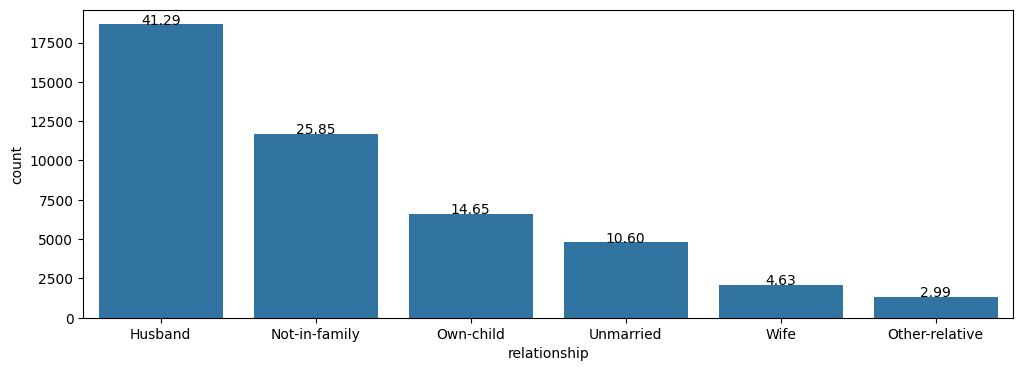

In [86]:
plt.figure(figsize=(12,4))

total = float(len(df['income']))

education_order = df['relationship'].value_counts().index

a = sns.countplot(x='relationship', data=df, order=education_order)

for f in a.patches:
    height = f.get_height()
    a.text(f.get_x() + f.get_width()/2., height+3, '{:1.2f}'.format((height/total)*100), ha="center")


husband has the maximum count. other-relative has minimum samples

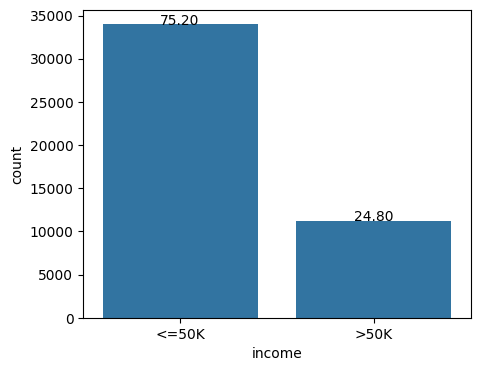

In [88]:
plt.figure(figsize=(5,4))
total = float(len(df) )
a = sns.countplot(x="income", data=df)
for p in a.patches:
    height = p.get_height()
    a.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f}'.format((height/total)*100),ha="center")

Text(0.5, 1.0, 'Box plot of INCOME and AGE')

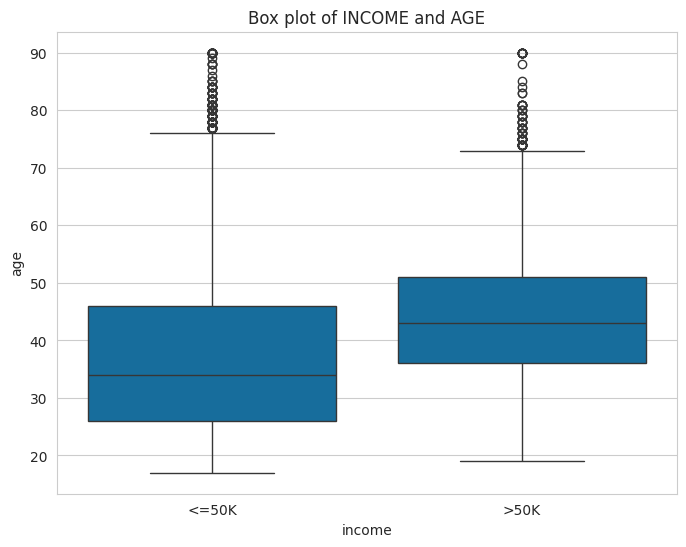

In [102]:
plt.figure(figsize=(8,6))
sns.set_palette("colorblind")  # Change to a different color palette
sns.boxplot(x='income',y='age',data=df).set_title('Box plot of INCOME and AGE')

we can see that the median age for people that earning more than 50k is  greater than the median of people earning less than 50k. So, older people are more likely to earn more than $50k a year as compared to their younger.

<Axes: xlabel='gender', ylabel='count'>

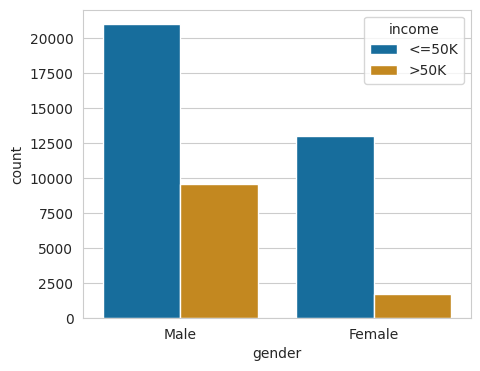

In [105]:
plt.figure(figsize=(5,4))
sns.countplot(x="gender", hue="income",data=df)

# feature selection

In [115]:
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K
10,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K
11,36,Federal-gov,212465,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K


In [107]:
df['educational-num'].unique()

array([ 7,  9, 12, 10,  6, 15,  4, 13, 14,  3, 11,  5, 16,  8,  2,  1])

In [109]:
df['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', '5th-6th',
       'Assoc-voc', '9th', 'Doctorate', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [131]:
df[df['education']=='HS-grad'][['education', 'educational-num']].head()

,education,educational-num
1,HS-grad,9
10,HS-grad,9
12,HS-grad,9
14,HS-grad,9
17,HS-grad,9


In [132]:
df[df['education']=='11th'][['education', 'educational-num']].head()

,education,educational-num
0,11th,7
31,11th,7
43,11th,7
48,11th,7
86,11th,7


we see that educational-num and education are similar:
every category in education represents with number in educational-num so they are the same

so lets drop education and that we already said that we dont need capital-gain and capital-loss.

In [273]:
df1 = df.drop(['education','capital-gain','capital-loss'],axis = 1)

In [274]:
df1.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,0
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,0
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,1
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,1
5,34,Private,198693,6,Never-married,Other-service,Not-in-family,White,Male,30,United-States,0


# Data Preprocessing

## Encoding
encode every categorical feature

In [275]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in df1.columns:
    if df1[column].dtype == 'object':
        df1[column] = le.fit_transform(df1[column])

In [276]:
df1.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,2,226802,7,4,6,3,2,1,40,38,0
1,38,2,89814,9,2,4,0,4,1,50,38,0
2,28,1,336951,12,2,10,0,4,1,40,38,1
3,44,2,160323,10,2,6,0,2,1,40,38,1
5,34,2,198693,6,4,7,1,4,1,30,38,0


In [277]:
df1.corr()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
age,1.000000,0.085825,-0.075590,0.037269,-0.271265,-0.004511,-0.247572,0.024179,0.081920,0.101604,-0.003645,0.236839
workclass,0.085825,1.000000,-0.034972,0.040771,-0.033152,0.017528,-0.065081,0.049799,0.069634,0.051378,0.003804,0.015644
fnlwgt,-0.075590,-0.034972,1.000000,-0.041992,0.033029,-0.002184,0.009828,-0.029282,0.027374,-0.018712,-0.060849,-0.007227
educational-num,0.037269,0.040771,-0.041992,1.000000,-0.064822,0.089713,-0.088604,0.031784,0.003455,0.146463,0.092158,0.332981
marital-status,-0.271265,-0.033152,0.033029,-0.064822,1.000000,0.016346,0.180410,-0.070318,-0.119996,-0.183007,-0.022291,-0.192499
occupation,-0.004511,0.017528,-0.002184,0.089713,0.016346,1.000000,-0.051718,0.000037,0.056853,0.016311,-0.002885,0.049752
relationship,-0.247572,-0.065081,0.009828,-0.088604,0.180410,-0.051718,1.000000,-0.118496,-0.583139,-0.259112,-0.007231,-0.253362
race,0.024179,0.049799,-0.029282,0.031784,-0.070318,0.000037,-0.118496,1.000000,0.089154,0.044826,0.124537,0.070883
gender,0.081920,0.069634,0.027374,0.003455,-0.119996,0.056853,-0.583139,0.089154,1.000000,0.231392,-0.004267,0.215741
hours-per-week,0.101604,0.051378,-0.018712,0.146463,-0.183007,0.016311,-0.259112,0.044826,0.231392,1.000000,0.007737,0.227146


 we see that fnlwgt is very low correlation with target

In [278]:

df1 = df1.drop('fnlwgt',axis=1)

## data Scalling
we see that fnlwgt has big values and another features are low so we need scalling

In [279]:
X = df1.drop('income',axis=1)
y = df1['income']

In [280]:
X = df1.drop('income',axis=1)
y = df1['income']

In [282]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [283]:
X.shape

(45175, 85)

In [284]:
y.shape

(45175,)

In [285]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Data Modeling

In [286]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

model = XGBClassifier()

# Train the model
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [287]:
y_pred = model.predict(X_test)

In [288]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8347229395705748